In [1]:
import sys, os

MARIPOSA_PATH = "/home/yizhou7/mariposa/"

sys.path.append(MARIPOSA_PATH + "src")
os.chdir(MARIPOSA_PATH)

from debugger.strainer import DebugStatus
from debugger.options import DbgMode, DebugOptions
from bench.viewer import BenchViewer
from bench.factory import *
from bench.consts import *
import numpy as np

viewer = get_combined_viewer()

[WARN] [proof] no proofs available 
[WARN] [init] e998d08b31 trace slow unknown, fallback to fast_fail 
[WARN] [proof] no proofs available 
[WARN] [proof] no proofs available 
[WARN] [init] 5b7d18ab3e trace did not fail, fallback to fast_fail 
[WARN] [init] 8d058577cd trace slow unknown, fallback to fast_fail 
[WARN] [proof] no proofs available 
[WARN] [proof] no proofs available 
[WARN] [init] 0b497bc090 trace did not fail, fallback to fast_fail 
[WARN] [init] 3cead21983 trace slow unknown, fallback to fast_fail 
[WARN] [init] 2a3b1202bd trace slow unknown, fallback to fast_fail 
[WARN] [init] d4e5e77cbc trace slow unknown, fallback to fast_fail 
[WARN] [proof] no proofs available 
[WARN] [proof] no proofs available 
[WARN] [init] 3ce5c5e4dc trace slow unknown, fallback to fast_fail 


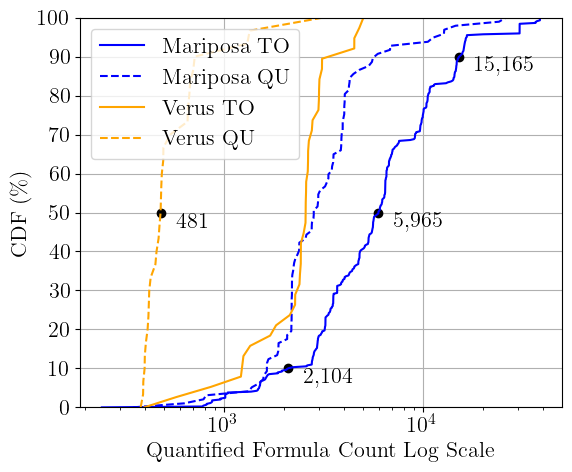

In [2]:
from utils.plot_utils import *
from utils.analysis_utils import *

fig, ax = plt.subplots(figsize=(6, 5))  # Figure size (width, height)

for mp in METAS:
    data = []
    for q in mp.members:
        dbg = viewer[q]
        stats = dbg.query_stats
        qcount = len(stats.all_qnames)
        if qcount == 0:
            continue
        data.append(qcount)

    data = np.array(data)
    cdf = PartialCDF(data)

    if mp == MP_TO:
        pt = np.percentile(cdf.xs, 90)
        ax.plot(pt, 90, marker="o", color="black")
        ax.text(pt*1.2, 90, f'{int(pt):,}', va='top', ha='left', color="black")

        pt = np.percentile(cdf.xs, 50)
        ax.plot(pt, 50, marker="o", color="black")
        ax.text(pt*1.2, 50, f'{int(pt):,}', va='top', ha='left', color="black")

        pt = np.percentile(cdf.xs, 10)
        ax.plot(pt, 10, marker="o", color="black")
        ax.text(pt*1.2, 10, f'{int(pt):,}', va='top', ha='left', color="black")

    if mp == VS_QU:
        # pt = np.percentile(cdf.xs, 90)
        # ax.plot(pt, 90, marker="o", color="black")
        # ax.text(pt*0.7, 90, f'{int(pt):,}', va='top', ha='left', color="black")

        pt = np.percentile(cdf.xs, 50)
        ax.plot(pt, 50, marker="o", color="black")
        ax.text(pt*1.2, 50, f'{int(pt):,}', va='top', ha='left', color="black")

        # pt = np.percentile(cdf.xs, 10)
        # ax.plot(pt, 10, marker="o", color="black")
        # ax.text(pt*0.7, 10, f'{int(pt):,}', va='top', ha='left', color="black")

    ax.plot(cdf.xs, cdf.ys, label=mp.full_name(), linestyle=mp.line_style, color=mp.color)

plt.legend()
plt.xlabel("Quantified Formula Count Log Scale")
ax.set_ylim(0, 100)
ax.set_yticks(np.arange(0, 101, 10))
ax.grid()
plt.ylabel("CDF (\%)")
ax.set_xscale("log")
plt.tight_layout()
plt.savefig("fig/debugger/quantifier_count_cdf.pdf", dpi=300, bbox_inches="tight", pad_inches=0.1)
# plt.close()